In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
# Read the data from file
df = pd.read_csv("WeatherData.csv")
print(df.shape[1])

17


In [3]:
# Filter the data from year 2010
df = df.iloc[331371:]

In [4]:
# Reset Index of the dataframe
df.reset_index(inplace=True)

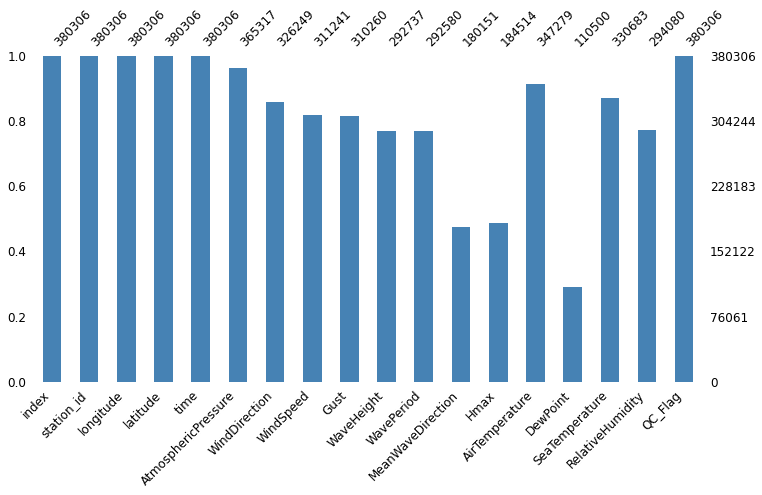

In [5]:
# Visualize the missing data
msno.bar(df,figsize=(12, 6), fontsize=12, color='steelblue')
plt.show()

In [6]:
# Calculate and display missing data percentage
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
print(missing_value_df)

                             column_name  percent_missing
index                              index         0.000000
station_id                    station_id         0.000000
longitude                      longitude         0.000000
latitude                        latitude         0.000000
time                                time         0.000000
AtmosphericPressure  AtmosphericPressure         3.941300
WindDirection              WindDirection        14.214080
WindSpeed                      WindSpeed        18.160376
Gust                                Gust        18.418326
WaveHeight                    WaveHeight        23.025932
WavePeriod                    WavePeriod        23.067214
MeanWaveDirection      MeanWaveDirection        52.629987
Hmax                                Hmax        51.482753
AirTemperature            AirTemperature         8.684323
DewPoint                        DewPoint        70.944450
SeaTemperature            SeaTemperature        13.048177
RelativeHumidi

In [7]:
# Drop the columns which are not required or which have missing data more than 50 per cent
df.drop(columns=["index","time","DewPoint","longitude","latitude","MeanWaveDirection","Hmax","QC_Flag"],inplace = True)

In [8]:
#  Filter the data only for 5 buouys
buoy_ident = { 'M2':1 , 'M3': 2, 'M4':3, 'M5': 4, 'M6': 5}
df = df.loc[df.station_id.isin(buoy_ident.keys()) ]
temp = df.to_numpy()

In [9]:
# Calculate and display missing data percentage
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
print(missing_value_df)

                             column_name  percent_missing
station_id                    station_id         0.000000
AtmosphericPressure  AtmosphericPressure         3.969807
WindDirection              WindDirection        14.316891
WindSpeed                      WindSpeed        18.290141
Gust                                Gust        18.551546
WaveHeight                    WaveHeight        23.192478
WavePeriod                    WavePeriod        23.234059
AirTemperature            AirTemperature         8.747136
SeaTemperature            SeaTemperature        13.142554
RelativeHumidity        RelativeHumidity        22.836787


In [10]:
# Drop the rows which have missing Atmospheric Pressure value as missing data for Atmospheric Pressure is less than 5 per cent
df.dropna(subset=["AtmosphericPressure"],inplace = True) 

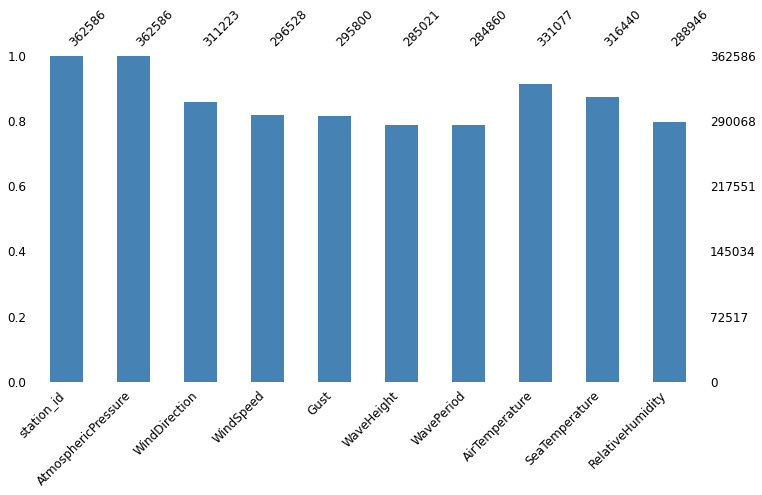

(362586, 10)


In [11]:
# Visualize the missing data again
msno.bar(df,figsize=(12, 6), fontsize=12, color='steelblue')
plt.show()
print(df.shape)

In [12]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(temp[:,:-1],temp[:,-1], test_size=0.2, random_state=0)

In [13]:
# Convert test and train numpy arrays to dataframes
df_train = pd.DataFrame(np.hstack((X_train,y_train[:, None])))
df_test = pd.DataFrame(np.hstack((X_test,y_test[:, None])))
print(df_train.shape)
print(df_test.shape)

(302060, 10)
(75515, 10)


In [14]:
# Add headers to test and train dataframes
df_train=pd.DataFrame(df_train.values, columns = ['station_id','AtmosphericPressure','WindDirection','WindSpeed','Gust','WaveHeight','WavePeriod','AirTemperature','SeaTemperature','RelativeHumidity'])
print(df_train.shape)
df_test=pd.DataFrame(df_test.values, columns = ['station_id','AtmosphericPressure','WindDirection','WindSpeed','Gust','WaveHeight','WavePeriod','AirTemperature','SeaTemperature','RelativeHumidity'])
print(df_test.shape)

(302060, 10)
(75515, 10)


In [15]:
train_copy=df_train.copy()
test_copy=df_test.copy()
train_copy.drop(columns=["station_id"],inplace = True)
test_copy.drop(columns=["station_id"],inplace = True)
print(train_copy.shape)

(302060, 9)


In [16]:
# # Using Simple Imputer with strategy "Mean" or "Most Frequent"
# from sklearn.impute import SimpleImputer
# imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
# imp_mean.fit(train_copy)
# train_trans=imp_mean.transform(train_copy)

In [17]:
# Using Iterative Imputer impute the missing data in all columns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(imputation_order='ascending')
imp.fit(train_copy)
train_trans=imp.transform(train_copy)
test_trans=imp.transform(test_copy)

/Users/aishwaryaagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [18]:
# Copy the imputed train data in data frames and save in csv file
df_train_new = pd.DataFrame(train_trans, columns = ['AtmosphericPressure','WindDirection','WindSpeed','Gust','WaveHeight','WavePeriod','AirTemperature','SeaTemperature','RelativeHumidity'])
df_train_final=pd.DataFrame()
df_train_final['station_id'] = df_train['station_id'].values
df_train_final = df_train_final.join(df_train_new)
print(df_train_final)
df_train_final.to_csv(r'ProcessedWeatherData.csv', index = False, header=True)

       station_id  AtmosphericPressure  WindDirection  WindSpeed       Gust  \
0              M3             1025.800     100.000000  11.000000  18.000000   
1              M2             1015.859     215.000000  10.474000  12.751000   
2              M5             1028.979      46.000000  12.523000  17.267000   
3              M5             1033.057     191.478594  14.146475  17.957728   
4              M6              992.100      20.000000  26.000000  35.000000   
...           ...                  ...            ...        ...        ...   
302055         M5             1024.109       8.000000   8.766000  11.043000   
302056         M4             1014.258     197.783591  15.207942  20.533539   
302057         M4              997.278     257.000000  12.808000  19.923000   
302058         M4              984.973     217.000000  15.939000  22.200000   
302059         M5             1013.574     182.000000  22.580000  30.170000   

        WaveHeight  WavePeriod  AirTemperature  Sea

In [19]:
# Copy the imputed test data in data frames and save in csv file
df_test_new = pd.DataFrame(train_trans, columns = ['AtmosphericPressure','WindDirection','WindSpeed','Gust','WaveHeight','WavePeriod','AirTemperature','SeaTemperature','RelativeHumidity'])
df_test_final=pd.DataFrame()
df_test_final['station_id'] = df_test['station_id'].values
df_test_final = df_test_final.join(df_test_new)
print(df_test_final)
df_test_final.to_csv(r'ProcessedWeatherDataTest.csv', index = False, header=True)

      station_id  AtmosphericPressure  WindDirection  WindSpeed       Gust  \
0             M3             1025.800     100.000000  11.000000  18.000000   
1             M5             1015.859     215.000000  10.474000  12.751000   
2             M6             1028.979      46.000000  12.523000  17.267000   
3             M4             1033.057     191.478594  14.146475  17.957728   
4             M6              992.100      20.000000  26.000000  35.000000   
...          ...                  ...            ...        ...        ...   
75510         M6             1021.008     216.000000  11.954000  15.369000   
75511         M6             1006.396     274.000000  10.246000  12.523000   
75512         M4             1021.960     226.000000   5.692000   8.681000   
75513         M2             1008.435     335.000000  17.988000  21.859000   
75514         M3             1009.700     200.000000  21.000000  29.000000   

       WaveHeight  WavePeriod  AirTemperature  SeaTemperature  

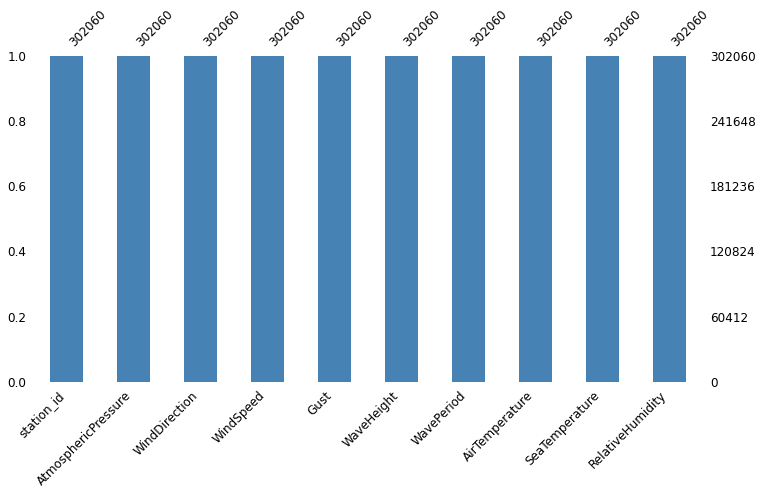

In [20]:
# after Imputation again visualize the missing train data
msno.bar(df_train_final,figsize=(12, 6), fontsize=12, color='steelblue')
plt.show()

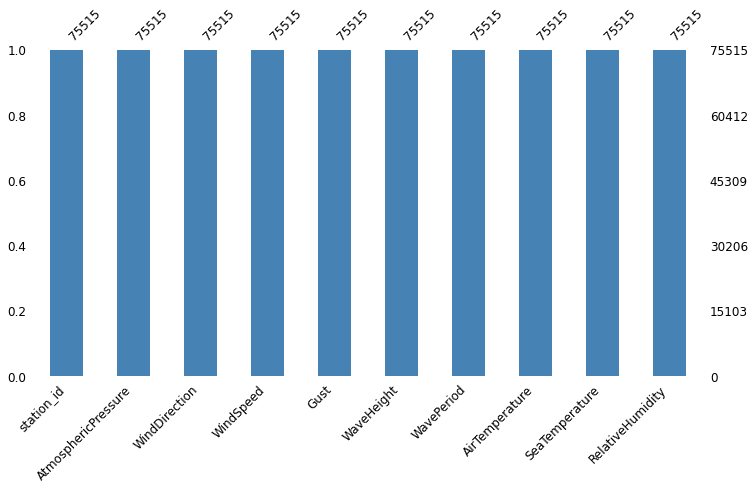

In [21]:
# after Imputation again visualize the missing test data
msno.bar(df_test_final,figsize=(12, 6), fontsize=12, color='steelblue')
plt.show()